## Project 5 - Time Series Analysis

In [2]:
import os as os

In [3]:
os.getcwd()

'C:\\Users\\archana'

In [4]:
os.chdir("C:\\Users\\archana\\Desktop\\DSP\\Py")
os.getcwd()

'C:\\Users\\archana\\Desktop\\DSP\\Py'

In [5]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [6]:
os.listdir()

['.RData',
 '.Rhistory',
 'ages.csv',
 'anscombe.csv',
 'bank-additional-full.csv',
 'BankCreditCard.csv',
 'blood_pressure.csv',
 'Breast Cancer - Data Description.rtf',
 'Cab_Rides - EDA.ipynb',
 'Cab_Rides+-+EDA.html',
 'cancerdata.csv',
 'chi-test.csv',
 'Credit_Risk_Test_data.csv',
 'Credit_Risk_Train_data.csv',
 'Credit_Risk_Validate_data.csv',
 'crop_yield.csv',
 'cross.csv',
 'data-zillow.csv',
 'demofile2.txt',
 'export_dataframe.csv',
 'haberman.csv',
 'house_price.csv',
 'movie_lens.txt',
 'New Text Document.txt',
 'phone_data.csv',
 'PIE.png',
 'PlantGrowth (1).csv',
 'PropertyPrice - description.txt',
 'Property_Price_Test.csv',
 'Property_Price_Train.csv',
 'snsdata.csv',
 'Super Store.csv',
 'SVM_Bank_Credit_Card_Sir',
 'train.csv']

### Data Exploration

In [37]:
furniture=pd.read_csv("Super Store.csv",encoding ='cp1252')

In [38]:
#Structure of the dataset
furniture.shape

(2121, 21)

In [39]:
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


Statistical Summay of the data :

In [40]:
furniture.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,2121.000000,2121,2121,2121,2121,2121,2121,2121,2121,2121,...,2121.000000,2121,2121,2121,2121,2121,2121.000000,2121.000000,2121.000000,2121.000000
unique,NaN,1764,889,960,4,707,707,3,1,371,...,NaN,4,375,1,4,380,NaN,NaN,NaN,NaN
top,NaN,US-2017-162558,9/5/2016,12/6/2017,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,...,NaN,West,FUR-FU-10004270,Furniture,Furnishings,KI Adjustable-Height Table,NaN,NaN,NaN,NaN
freq,NaN,4,10,10,1248,15,15,1113,2121,192,...,NaN,707,16,2121,957,18,NaN,NaN,NaN,NaN
mean,5041.643564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55726.556341,NaN,NaN,NaN,NaN,NaN,349.834887,3.785007,0.173923,8.699327
std,2885.740258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32261.888225,NaN,NaN,NaN,NaN,NaN,503.179145,2.251620,0.181547,136.049246
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,1.892000,1.000000,0.000000,-1862.312400
25%,2568.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22801.000000,NaN,NaN,NaN,NaN,NaN,47.040000,2.000000,0.000000,-12.849000
50%,5145.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60505.000000,NaN,NaN,NaN,NaN,NaN,182.220000,3.000000,0.200000,7.774800
75%,7534.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90032.000000,NaN,NaN,NaN,NaN,NaN,435.168000,5.000000,0.300000,33.726600


### Feature Engineering

Checking data types and missing values :

In [41]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
Row ID           2121 non-null int64
Order ID         2121 non-null object
Order Date       2121 non-null object
Ship Date        2121 non-null object
Ship Mode        2121 non-null object
Customer ID      2121 non-null object
Customer Name    2121 non-null object
Segment          2121 non-null object
Country          2121 non-null object
City             2121 non-null object
State            2121 non-null object
Postal Code      2121 non-null int64
Region           2121 non-null object
Product ID       2121 non-null object
Category         2121 non-null object
Sub-Category     2121 non-null object
Product Name     2121 non-null object
Sales            2121 non-null float64
Quantity         2121 non-null int64
Discount         2121 non-null float64
Profit           2121 non-null float64
dtypes: float64(3), int64(3), object(15)
memory usage: 348.1+ KB


In [42]:
furniture.isnull().sum().sort_values(ascending=False)

Profit           0
City             0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
State            0
Discount         0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Row ID           0
dtype: int64

Checking the time stamp of the Sales data :

In [43]:
print(furniture['Order Date'].min(),furniture['Order Date'].max())

1/1/2017 9/9/2017


Removing the variables that we do not need :

In [21]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

In [23]:
#Only columns in data set is the Order Date and Sales
furniture.shape

(2121, 2)

To get monthly Sales Data :

In [24]:
#Aggregate sales data by date
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
#Indexing with the Time Series Data

#Resampling the datetime data.#Here we use the start of each month as the timestamp and #take the average daily sales value
#for a particular month since working with the current datetime data becomes tricky

furniture['Order Date'] = pd.to_datetime(furniture['Order Date'])
furniture.set_index('Order Date', inplace=True)
furniture.index


DatetimeIndex(['2017-01-01', '2014-01-10', '2015-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11', '2017-01-12', '2014-01-13',
               '2015-01-13', '2017-01-13',
               ...
               '2014-09-07', '2015-09-07', '2017-09-07', '2014-09-08',
               '2015-09-08', '2016-09-08', '2017-09-08', '2014-09-09',
               '2016-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [25]:
    furniture.head()

,Sales
Order Date,
2017-01-01,975.490
2014-01-10,51.940
2015-01-10,1018.104
2016-01-10,104.770
2014-01-11,9.940


In [27]:
#Resampling with Month Start
furniture.index
y=furniture['Sales'].resample('MS').mean()

In [28]:
#Sales data for the year 2017 :
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

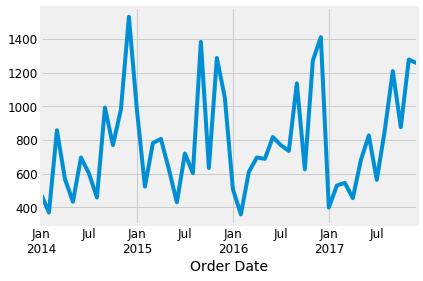

In [30]:
#Visualizing Furniture Sales Time Series Data
y.plot()
plt.show()

Time Series data is almost Stationary. It also exhibit seasonality. The sales is always low at the begining of the year and maximum at the end of the year

### Checking Stationarity

ADF(Augmented Dickey Fuller) Test : 
Null hypothesis - time series is not stationary and Alternate Hypothesis -Time Series is stationary

In [17]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
#series = Series.from_csv('daily-total-female-births.csv', header=0)
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -5.191070
p-value: 0.000009
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


Since p value(0.000009) is much less than threshold (0.05), null hypothesis is rejected.

### Decomposing the data into : Trend, Seasonality and Noise

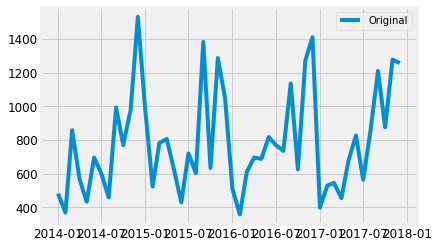

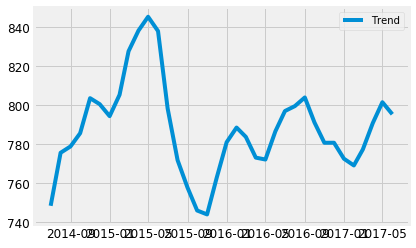

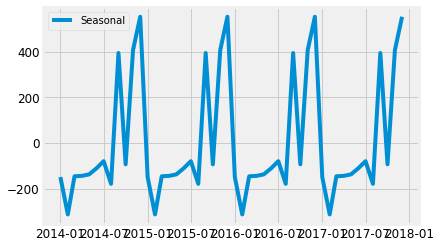

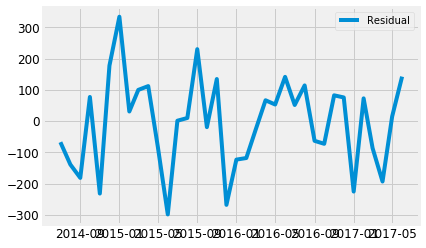

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')


### Forecasting

We use ARIMA model for forecasting our time series.
ARIMA (p,d,q) , where p- seasonality, d- trend and q- noise


The integrated element(d) refers to differencing allowing the method to support time series data with a trend.
A problem with ARIMA is that it does not support seasonal data. That is a time series with a repeating cycle.
ARIMA expects data that is either not seasonal or has the seasonal component removed,
e.g. seasonally adjusted via methods such as seasonal differencing. 

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component


In [19]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


### Model Comparision / Parameter Selection

We use grid search to find optimal set of parameters that yeilds the best performance of our model. We will choose the model with minimum AIC value

In [20]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False, 
enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916


C:\Users\archana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1263.6046453069762
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.71701309202183
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338


C:\Users\archana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1132.6947985776474
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.00471991163414
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758124


C:\Users\archana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:nan
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.5607429809133


C:\Users\archana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5884419204051
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2450.996677872993
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946865
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1199.9127569000627
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785672282035
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.7889663004408


C:\Users\archana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1421.8560384028808
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.905617681696
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2965.242818654436
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.87055484827766
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.18329774425996
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:3196.017013986169
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.7574368417353
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067711


C:\Users\archana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1458.2770269380335
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.92593679351927


C:\Users\archana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1048.4190078921263
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.4664675084565
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442186424


C:\Users\archana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2647.9390095912477
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.36851958150424
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633238766806
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2431.6755233798685
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.01560021282273
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541903
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1202.056267904921
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.20034222811347
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.3403658784775


C:\Users\archana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1315.751384380875
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.6270901345402
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835369


C:\Users\archana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2354.749267266461
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.4762687610142
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.52503546608517


C:\Users\archana\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2573.478848611995
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.7875439542927


### Minimum AIC:297.7875439542927, is for the model  ARIMA(1, 1, 1)x(1, 1, 0, 12)12

### Fitting SARIMA model :

In [47]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


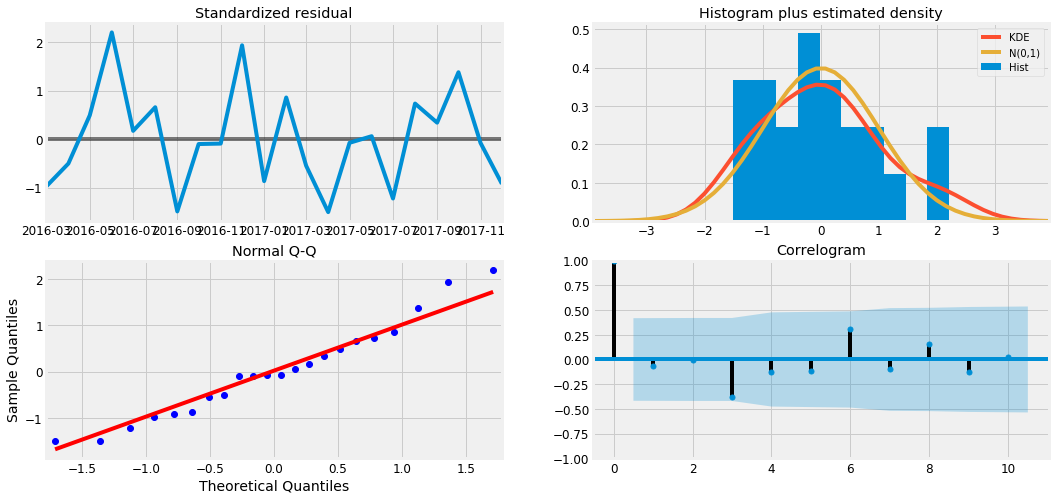

In [48]:
#Running model diagnostics to test unusual behaviour
results.plot_diagnostics(figsize=(16, 8))
plt.show()


1) Standardized Residual - Residual scatter around mean 0, with no particular trend/pattern.

2) Histogram plus estimated density- Distribution close to normal.

3) Normal QQ Plot - points close to the QQ line, indicatin g distribution close to normal.

4) Correlogram - No points with autocorrelation outside of the 2 standard error bands for white noise.


#### Model Diagnostics indicate that the model residuals are normally distributed

### Validating Forecasts (Model Comparison) :

Comparing the predicted sales to actual sales to understand accuracy of our model

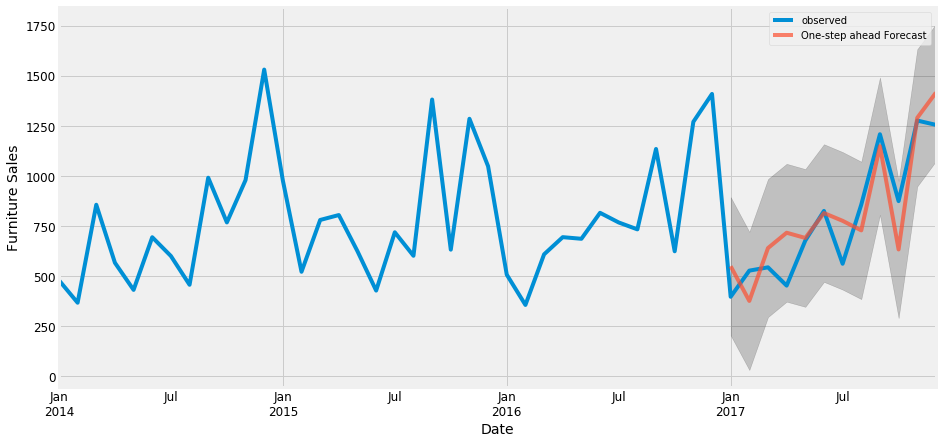

In [23]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()


The above plot indicates that the observed value and the rolling forecast predictions align well.

### Calculating RMSE

In [24]:
y_forecasted=pred.predicted_mean
y_truth=y['2017-01-01':]
mse=((y_forecasted-y_truth)**2).mean()
print('Root mean squared error of our forecast is {}'.format(round(np.sqrt(mse),2)))

Root mean squared error of our forecast is 151.64


RMSE tells our model was able to forecast the average daily furniture sales in the test set within 151.64 of the real sales

### Visualizing the Forecast

            lower Sales  upper Sales
2018-01-01    66.439685   751.053451
2018-02-01   191.940452   876.931560
2018-03-01   214.443220   899.438856
2018-04-01   127.554372   812.550075
2018-05-01   346.657644  1031.653348
2018-06-01   494.346972  1179.342675
2018-07-01   235.873454   920.869158
2018-08-01   522.882077  1207.877781
2018-09-01   875.774983  1560.770686
2018-10-01   537.150079  1222.145782
2018-11-01   945.782331  1630.778034
2018-12-01   928.336213  1613.331916
2019-01-01   -66.357282   904.538734


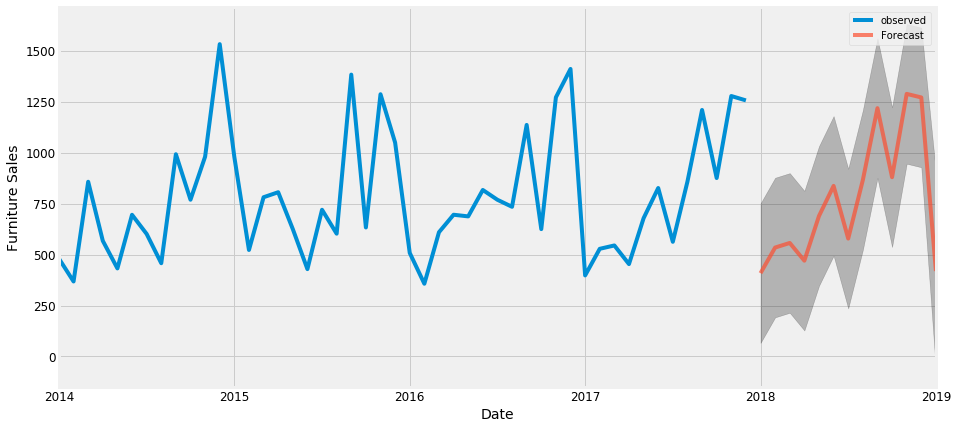

In [51]:
pred_uc = results.get_forecast(steps=13)
pred_ci= pred_uc.conf_int()
ax = y.plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()




### Conclusion

Sales of furniture has seasonal pattern. Starting of every year, the sales is low and increases lineraly over time ina ayear.